### Keras & Tensorflow Sequential Model and Training Details

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
x = np.arange(1,1000,5)
y = x + 25
# print(x, y)
len(x)

200

In [14]:
x_train = x[:160]
y_train = y[:160]
x_test = x[160:]
y_test = y[160:]

In [15]:
lrmld = tf.keras.Sequential(name="NeuralFolk01")

lrmld.add(tf.keras.layers.Dense(100, name='input_layer', input_shape=[1], activation='relu'))
lrmld.add(tf.keras.layers.Dense(50, name='first_hidden_layer', input_shape=[1], activation='relu'))
lrmld.add(tf.keras.layers.Dense(25, name='second_hidden_layer', input_shape=[1], activation='relu'))
lrmld.add(tf.keras.layers.Dense(1,name='output_layer', activation='linear'))

adam = tf.keras.optimizers.Adam(learning_rate=0.01)
lrmld.compile(loss='mae', optimizer=adam, metrics=['mae'])
lrmld.summary()


Model: "NeuralFolk01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_hidden_layer (Dense)      │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_hidden_layer (Dense)     │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,551 (25.59 KB)

 Trainable params: 6,551 (25.59 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = lrmld.fit(x, y, epochs=500, validation_data=(x_test, y_test))

lrmld.predict(np.array([125]))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 465.6823 - mae: 465.6823 - val_loss: 83.1544 - val_mae: 83.1544
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 113.5751 - mae: 113.5751 - val_loss: 114.9173 - val_mae: 114.9173
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 111.1781 - mae: 111.1781 - val_loss: 39.0848 - val_mae: 39.0848
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 54.2253 - mae: 54.2253 - val_loss: 35.6539 - val_mae: 35.6539
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 36.9078 - mae: 36.9078 - val_loss: 117.2323 - val_mae: 117.2323
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 40.7771 - mae: 40.7771 - val_loss: 9.6770 - val_mae: 9.6770
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.8312 - mae: 14.8312 - val_loss: 23.5041 - val_mae: 23.5041
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.2065 - mae: 11.2065 - val_loss: 6.4878 - val_mae: 6.4878
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━

array([[146.20486]], dtype=float32)

In [17]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

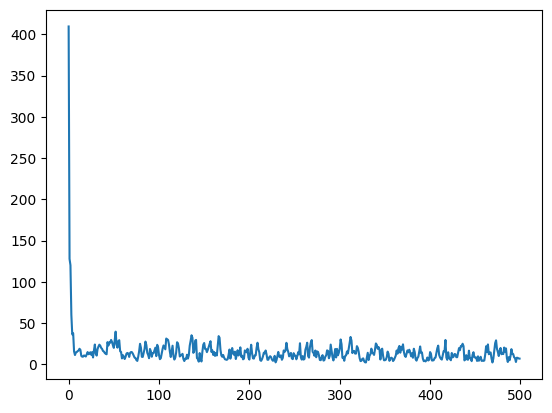

In [18]:
plt.plot(history.history['loss'])

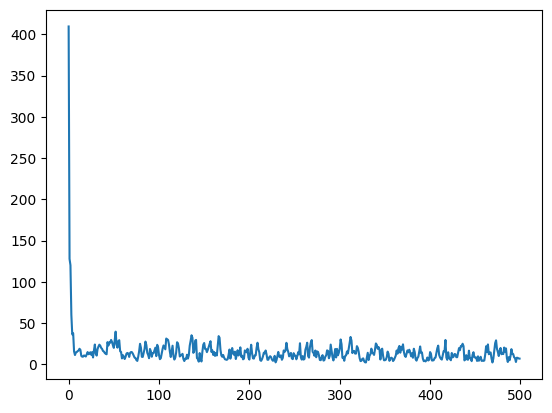

In [19]:
plt.plot(history.history['loss'])

In [21]:
tf.keras.utils.plot_model(lrmld, show_shapes= True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [22]:
lrmld.save('lrmld.h5')

In [23]:
lrmld.save('lrmld.keras')